In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data merging

In [2]:
data_dir = "/Users/trevoryu/Code/data/bdpp_data/"
files = glob.glob(data_dir + "*.csv")
files

['/Users/trevoryu/Code/data/bdpp_data/pumpkin_seeds.csv',
 '/Users/trevoryu/Code/data/bdpp_data/date_fruits.csv',
 '/Users/trevoryu/Code/data/bdpp_data/preprocessed.csv',
 '/Users/trevoryu/Code/data/bdpp_data/dry_beans.csv',
 '/Users/trevoryu/Code/data/bdpp_data/pistachios.csv']

In [3]:
dfs = []
cols = []
for csv_file in files:
    if "preprocessed" in csv_file:
        continue
    df = pd.read_csv(csv_file)
    # All caps and presence of underscore makes titles different
    df = df.rename(columns=lambda x: x.lower().strip().replace("_", ""))
    # Mispelling of "aspect ratio" and omission of "length" from axis measurements
    df = df.rename(columns={
        "aspectration": "aspectratio",
        "eqdiasq": "equivalentdiameter",
        "equivdiameter": "equivalentdiameter",
        "majoraxis": "majoraxislength",
        "minoraxis": "minoraxislength",
        "class": "variety",
    })
    food_class = csv_file.split("/")[-1].split(".csv")[0]
    df["class"] = food_class
    dfs.append(df)
    cols.append(set(df.columns.tolist()))

In [4]:
# Pumpkin seeds has the fewest columns, so we should expect all the others to contain them all
cols

[{'area',
  'aspectratio',
  'class',
  'compactness',
  'convexarea',
  'eccentricity',
  'equivalentdiameter',
  'extent',
  'majoraxislength',
  'minoraxislength',
  'perimeter',
  'roundness',
  'solidity',
  'variety'},
 {'alldaub4rb',
  'alldaub4rg',
  'alldaub4rr',
  'area',
  'aspectratio',
  'class',
  'compactness',
  'convexarea',
  'eccentricity',
  'entropyrb',
  'entropyrg',
  'entropyrr',
  'equivalentdiameter',
  'extent',
  'kurtosisrb',
  'kurtosisrg',
  'kurtosisrr',
  'majoraxislength',
  'meanrb',
  'meanrg',
  'meanrr',
  'minoraxislength',
  'perimeter',
  'roundness',
  'shapefactor1',
  'shapefactor2',
  'shapefactor3',
  'shapefactor4',
  'skewrb',
  'skewrg',
  'skewrr',
  'solidity',
  'stddevrb',
  'stddevrg',
  'stddevrr',
  'variety'},
 {'area',
  'aspectratio',
  'class',
  'compactness',
  'convexarea',
  'eccentricity',
  'equivalentdiameter',
  'extent',
  'majoraxislength',
  'minoraxislength',
  'perimeter',
  'roundness',
  'shapefactor1',
  'shape

In [5]:
import functools
import operator
common_cols = sorted(functools.reduce(operator.and_, cols))
common_cols

['area',
 'aspectratio',
 'class',
 'compactness',
 'convexarea',
 'eccentricity',
 'equivalentdiameter',
 'extent',
 'majoraxislength',
 'minoraxislength',
 'perimeter',
 'roundness',
 'solidity',
 'variety']

In [6]:
dfs[0]

,area,perimeter,majoraxislength,minoraxislength,convexarea,equivalentdiameter,eccentricity,solidity,extent,roundness,aspectratio,compactness,variety,class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik,pumpkin_seeds
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik,pumpkin_seeds
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik,pumpkin_seeds
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik,pumpkin_seeds
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik,pumpkin_seeds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,Ürgüp Sivrisi,pumpkin_seeds
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,Ürgüp Sivrisi,pumpkin_seeds
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,Ürgüp Sivrisi,pumpkin_seeds
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi,pumpkin_seeds


In [7]:
df = pd.concat(x[common_cols] for x in dfs)
df = df.reset_index(drop=True)
df

,area,aspectratio,class,compactness,convexarea,eccentricity,equivalentdiameter,extent,majoraxislength,minoraxislength,perimeter,roundness,solidity,variety
0,56276,1.4809,pumpkin_seeds,0.8207,56831,0.7376,267.6805,0.7453,326.1485,220.2388,888.2420,0.8963,0.9902,Çerçevelik
1,76631,1.7811,pumpkin_seeds,0.7487,77280,0.8275,312.3614,0.7151,417.1932,234.2289,1068.1460,0.8440,0.9916,Çerçevelik
2,71623,2.0651,pumpkin_seeds,0.6929,72663,0.8749,301.9822,0.7400,435.8328,211.0457,1082.9870,0.7674,0.9857,Çerçevelik
3,66458,1.7146,pumpkin_seeds,0.7624,67118,0.8123,290.8899,0.7396,381.5638,222.5322,992.0510,0.8486,0.9902,Çerçevelik
4,66107,1.7413,pumpkin_seeds,0.7557,67117,0.8187,290.1207,0.6752,383.8883,220.4545,998.1460,0.8338,0.9850,Çerçevelik
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19152,85983,1.7855,pistachios,0.7446,87536,0.8284,330.8730,0.6799,444.3447,248.8627,1157.1160,0.8070,0.9823,Siirt_Pistachio
19153,85691,1.5770,pistachios,0.7509,96439,0.7732,330.3107,0.6590,439.8794,278.9297,2327.3459,0.1988,0.8886,Siirt_Pistachio
19154,101136,1.7514,pistachios,0.7551,102286,0.8210,358.8459,0.7584,475.2161,271.3299,1255.6190,0.8061,0.9888,Siirt_Pistachio
19155,97409,1.6468,pistachios,0.7788,98376,0.7945,352.1718,0.7635,452.1823,274.5764,1195.2150,0.8569,0.9902,Siirt_Pistachio


# EDA

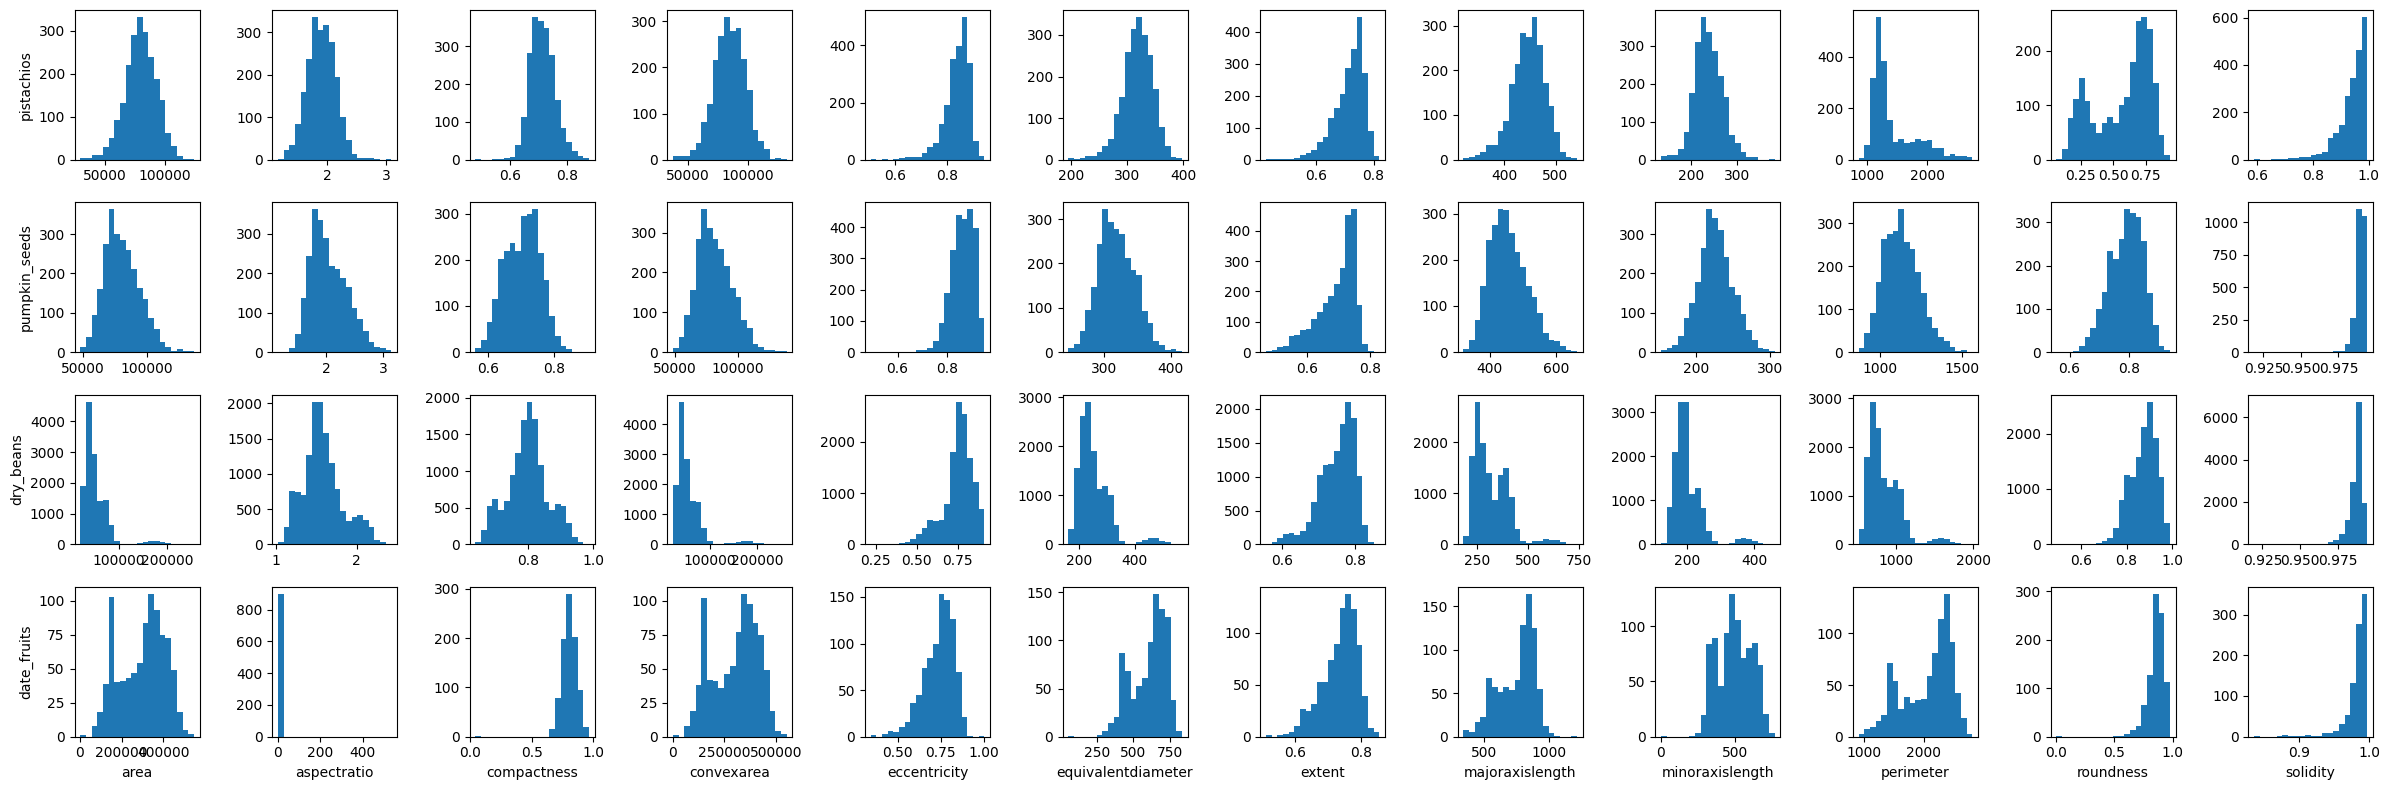

In [8]:
# Plot dists of each column
classes = list(set(df["class"]))
cols = df.columns.drop(["variety", "class"]).tolist()

fig, axs = plt.subplots(len(classes), len(cols), figsize=(2*len(cols), 2*len(classes)))

for i, (c, ax_rows) in enumerate(zip(classes, axs)):
    subdf = df.loc[df["class"] == c, cols]
    for j, (col, ax) in enumerate(zip(cols, ax_rows)):
        ax.hist(subdf[col].values, bins=20)
        if i == len(classes) - 1:
            ax.set_xlabel(col)
        if j == 0:
            ax.set_ylabel(c)
    
plt.tight_layout()
plt.show()

`aspectratio` in `date_fruits` definitely has an outlier at 500.

In [9]:
df.groupby("class").count()

,area,aspectratio,compactness,convexarea,eccentricity,equivalentdiameter,extent,majoraxislength,minoraxislength,perimeter,roundness,solidity,variety
class,,,,,,,,,,,,,
date_fruits,898,898,898,898,898,898,898,898,898,898,898,898,898
dry_beans,13611,13611,13611,13611,13611,13611,13611,13611,13611,13611,13611,13611,13611
pistachios,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148
pumpkin_seeds,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500


In [10]:
classes

['pistachios', 'pumpkin_seeds', 'dry_beans', 'date_fruits']

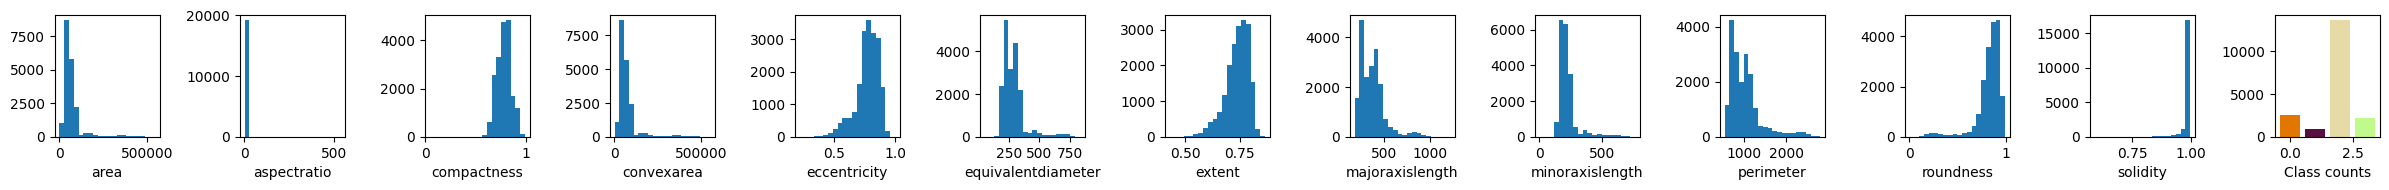

In [11]:
from collections import Counter
fig, axs = plt.subplots(1, len(cols) + 1, figsize=(24, 2))
color_map = {
    "pumpkin_seeds": "xkcd:pumpkin",
    "date_fruits": "xkcd:plum",
    "dry_beans": "xkcd:beige",
    "pistachios": "xkcd:pistachio"
}

for col, ax in zip(cols, axs):
    ax.hist(df[col].values, bins=20)
    ax.set_xlabel(col)

counts = Counter(df["class"].values)
axs[-1].bar(
    np.arange(4), counts.values(),
    color=[color_map[key] for key in counts.keys()],
)
axs[-1].set_xlabel("Class counts")
plt.tight_layout()
plt.show()

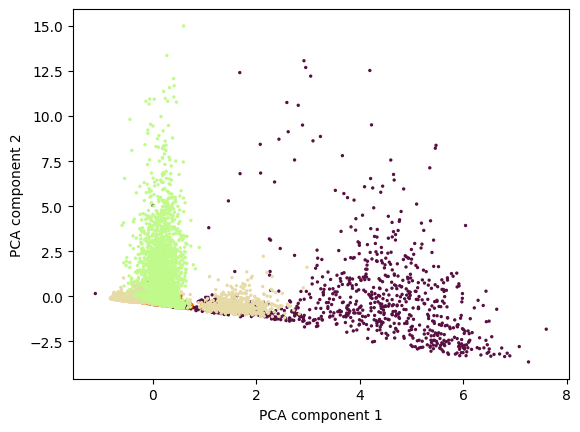

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, whiten=True)
projection = pca.fit_transform(df[cols].values)

colors = [color_map[c] for c in df["class"]]

plt.scatter(projection[:, 0], projection[:, 1], color=colors, s=2)
plt.xlabel("PCA component 1")
plt.ylabel("PCA component 2")
plt.show()

In [13]:
# %matplotlib widget

In [14]:
# pca = PCA(n_components=3, whiten=True)
# projection = pca.fit_transform(df[cols].values)

# colors = [color_map[c] for c in df["class"]]

# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')

# ax.scatter(xs=projection[:, 0], ys=projection[:, 1], zs=projection[:, 2], color=colors, s=2)
# ax.set_xlabel("PCA component 1")
# ax.set_ylabel("PCA component 2")
# ax.set_zlabel("PCA component 3")
# plt.show()

# Outliers

Compute Z-score by applying StandardScaler.

Then, remove outliers with $|z| > 6$ from the dataset.

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler().set_output(transform="pandas")

dfx = df[cols]
dfx = scaler.fit_transform(dfx)

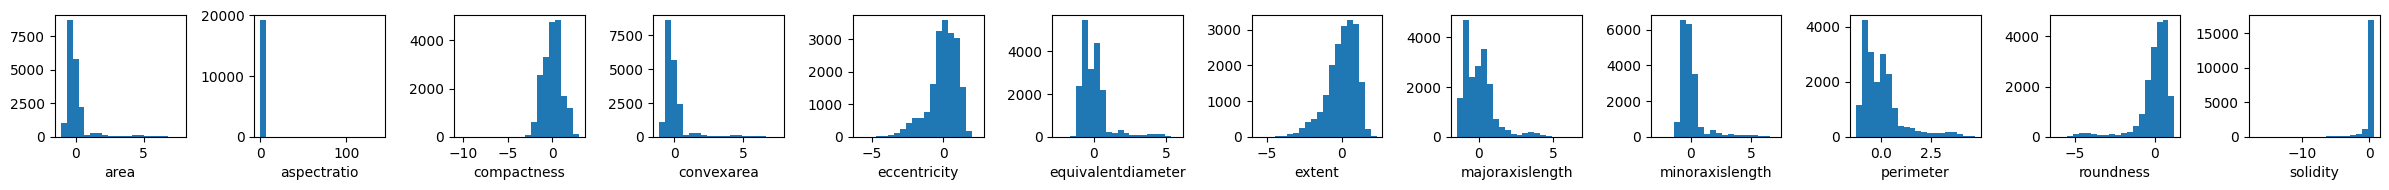

In [17]:
fig, axs = plt.subplots(1, len(cols), figsize=(24, 2))

for col, ax in zip(cols, axs):
    ax.hist(dfx[col].values, bins=20)
    ax.set_xlabel(col)

plt.tight_layout()
plt.show()

In [18]:
outlier_mask = (dfx > 6) | (dfx < -6)
outlier_mask.sum(axis=0)

area                   53
aspectratio             1
compactness             1
convexarea             41
eccentricity            0
equivalentdiameter      0
extent                  0
majoraxislength         1
minoraxislength        25
perimeter               0
roundness               1
solidity              102
dtype: int64

In [19]:
outlier_mask = outlier_mask.any(axis=1)

df.loc[outlier_mask, ["class", "variety"]].groupby("class").count()

,variety
class,
date_fruits,61
pistachios,100


In [20]:
df[["class", "variety"]].groupby("class").count()

,variety
class,
date_fruits,898
dry_beans,13611
pistachios,2148
pumpkin_seeds,2500


Dropping 60/900 = 6.7% of dates

Dropping 100/2100 = 4.7% of pistachios

In [21]:
df.loc[outlier_mask, ["class", "variety"]].groupby("variety").count()

,class
variety,
BERHI,12
DEGLET,1
DOKOL,1
IRAQI,32
Kirmizi_Pistachio,58
ROTANA,14
SAFAVI,1
Siirt_Pistachio,42


In [22]:
df[["class", "variety"]].groupby("variety").count()

,class
variety,
BARBUNYA,1322
BERHI,65
BOMBAY,522
CALI,1630
DEGLET,98
DERMASON,3546
DOKOL,204
HOROZ,1928
IRAQI,72


BEHRI: 12/65 = 18.5% dropped

IRAQI: 32/72 = 44.4% dropped

Kirmizi: 58/1232 = 4.7% dropped

ROTANA: 14/166 = 8.4% dropped

Siirt: 42/616 = 4.5% dropped

In [23]:
dfx = dfx.loc[~outlier_mask, :]

In [24]:
dfx

,area,aspectratio,compactness,convexarea,eccentricity,equivalentdiameter,extent,majoraxislength,minoraxislength,perimeter,roundness,solidity
0,-0.239477,-0.057676,0.601668,-0.249104,-0.394052,-0.186192,0.133002,-0.354749,-0.037375,-0.320879,0.519165,0.355837
1,0.087938,0.019910,-0.412415,0.073633,0.562506,0.281669,-0.413466,0.345412,0.142566,0.147384,0.122865,0.416040
2,0.007383,0.093310,-1.198328,0.000765,1.066853,0.172987,0.037099,0.488756,-0.155616,0.186013,-0.457566,0.162324
3,-0.075697,0.002723,-0.219457,-0.086749,0.400774,0.056837,0.029861,0.071411,-0.007877,-0.050680,0.157721,0.355837
4,-0.081343,0.009624,-0.313823,-0.086765,0.468872,0.048783,-1.135455,0.089287,-0.034600,-0.034816,0.045575,0.132222
...,...,...,...,...,...,...,...,...,...,...,...,...
19152,0.238367,0.021047,-0.470161,0.235498,0.572082,0.475507,-1.050408,0.554215,0.330785,0.378959,-0.157500,0.016115
19153,0.233670,-0.032839,-0.381429,0.376010,-0.015259,0.469619,-1.428593,0.519876,0.717506,3.424890,-4.766095,-4.013238
19154,0.482107,0.012234,-0.322274,0.468290,0.493344,0.768416,0.370046,0.791625,0.619757,0.635347,-0.164320,0.295633
19155,0.422157,-0.014799,0.011528,0.406581,0.211378,0.698530,0.462330,0.614488,0.661514,0.478125,0.220614,0.355837


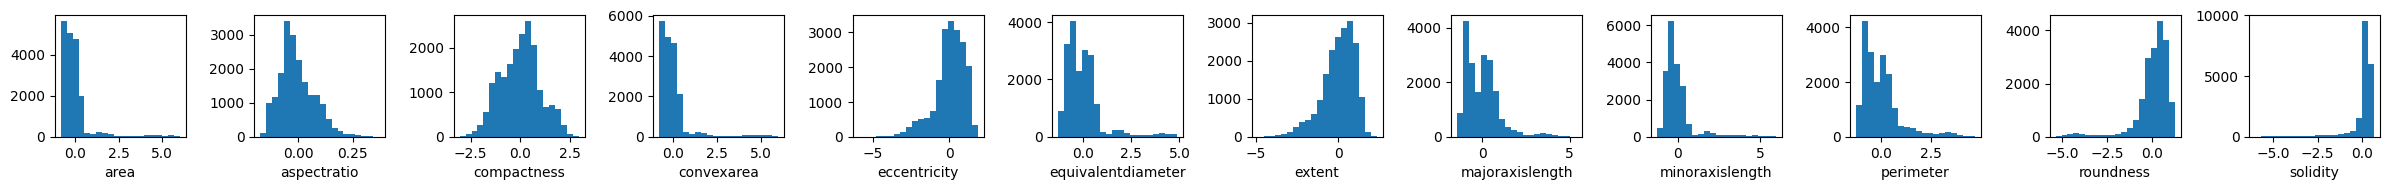

In [25]:
fig, axs = plt.subplots(1, len(cols), figsize=(24, 2))

for col, ax in zip(cols, axs):
    ax.hist(dfx[col].values, bins=20)
    ax.set_xlabel(col)

plt.tight_layout()
plt.show()

# Create df for training

In [26]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [27]:
labels = df.loc[~outlier_mask, "class"]
encoded_labels = label_encoder.fit_transform(labels)
dfx["labels"] = encoded_labels
dfx = dfx.reset_index(drop=True)
dfx

,area,aspectratio,compactness,convexarea,eccentricity,equivalentdiameter,extent,majoraxislength,minoraxislength,perimeter,roundness,solidity,labels
0,-0.239477,-0.057676,0.601668,-0.249104,-0.394052,-0.186192,0.133002,-0.354749,-0.037375,-0.320879,0.519165,0.355837,3
1,0.087938,0.019910,-0.412415,0.073633,0.562506,0.281669,-0.413466,0.345412,0.142566,0.147384,0.122865,0.416040,3
2,0.007383,0.093310,-1.198328,0.000765,1.066853,0.172987,0.037099,0.488756,-0.155616,0.186013,-0.457566,0.162324,3
3,-0.075697,0.002723,-0.219457,-0.086749,0.400774,0.056837,0.029861,0.071411,-0.007877,-0.050680,0.157721,0.355837,3
4,-0.081343,0.009624,-0.313823,-0.086765,0.468872,0.048783,-1.135455,0.089287,-0.034600,-0.034816,0.045575,0.132222,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18991,0.238367,0.021047,-0.470161,0.235498,0.572082,0.475507,-1.050408,0.554215,0.330785,0.378959,-0.157500,0.016115,2
18992,0.233670,-0.032839,-0.381429,0.376010,-0.015259,0.469619,-1.428593,0.519876,0.717506,3.424890,-4.766095,-4.013238,2
18993,0.482107,0.012234,-0.322274,0.468290,0.493344,0.768416,0.370046,0.791625,0.619757,0.635347,-0.164320,0.295633,2
18994,0.422157,-0.014799,0.011528,0.406581,0.211378,0.698530,0.462330,0.614488,0.661514,0.478125,0.220614,0.355837,2


In [28]:
dfx.to_csv("/Users/trevoryu/Code/data/bdpp_data/preprocessed.csv", index=False)

In [29]:
label_encoder.classes_

array(['date_fruits', 'dry_beans', 'pistachios', 'pumpkin_seeds'],
      dtype=object)

Classes:
- 0 = date_fruits
- 1 = dry_beans
- 2 = pistachios
- 3 = pumpkin_seeds